In [1]:
%load_ext autoreload
%autoreload 2

import geoopt
import torch as th
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from geoopt.manifolds.lorentz import Lorentz
from geoopt.manifolds.lorentz import math

In [2]:
k = 2. # choose curvature parameter
dim = 2

In [3]:
man = Lorentz(k=k)

# Projection on manifold

In [4]:
x = th.randn((20,dim)) # sample points (~N(0,1))
x = man.projx(x) # project onto the hyperboloid

In [5]:
# check if single point is in Hyperboloid
man._check_point_on_manifold(x[0])

tensor(-2.)


(True, None)

In [6]:
x_np = x.numpy()

In [7]:
lins_x = np.linspace(-3, 3, 100)
linx_y = np.sqrt(k + lins_x**2)

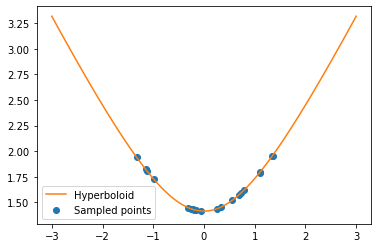

In [8]:
plt.plot(lins_x, linx_y, color="C1", label="Hyperboloid")
plt.scatter(x_np[:,1], x_np[:,0], label="Sampled points")
plt.legend()

# Projection on tangent space

In [9]:
p = x
u = th.randn(20,dim)
u = man.proju(p, u) # project on tangent space

In [10]:
# check vector is in tangent space of point x
man._check_vector_on_tangent(p, u)

(True, None)

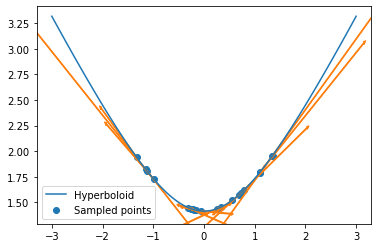

In [11]:
plt.plot(lins_x, linx_y, color="C0", label="Hyperboloid")
plt.scatter(x_np[:,1], x_np[:,0], label="Sampled points")
for i in range(20):
    plt.arrow(p[i,1], p[i,0], u[i,1], u[i,0], width=0.01, color="C1")
plt.legend()

# Parallel transport

In [24]:
x_start = th.randn((1,dim))
x_start = man.projx(x_start)

u_on_s = th.randn((1, dim))
u_on_s = u_on_s / u_on_s.norm(dim=-1)
u_on_s = man.proju(x_start, u_on_s)

x_end = th.randn((1,dim))
x_end = man.projx(x_end)


u_on_e = th.randn((1, dim))

Text(0.5, 1.0, 'Initial setup')

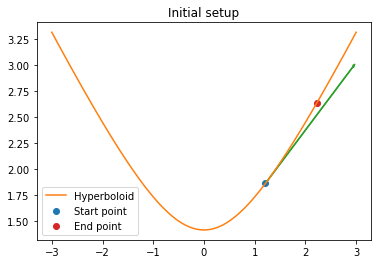

In [25]:
plt.plot(lins_x, linx_y, color="C1", label="Hyperboloid")
plt.scatter(x_start[0,1], x_start[0,0], color="C0", label="Start point")
plt.arrow(x_start[0,1], x_start[0,0], u_on_s[0,1], u_on_s[0,0], width=0.01, color="C2")

plt.scatter(x_end[0,1], x_end[0,0], color="C3", label="End point")
plt.legend()
plt.title("Initial setup")

In [26]:
u_on_e = man.transp(x_start, x_end, u_on_s) # find the transported vector

Text(0.5, 1.0, 'Parallel transport')

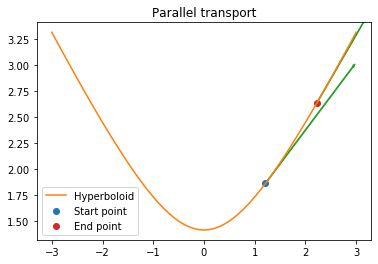

In [27]:
plt.plot(lins_x, linx_y, color="C1", label="Hyperboloid")
plt.scatter(x_start[0,1], x_start[0,0], color="C0", label="Start point")
plt.arrow(x_start[0,1], x_start[0,0], u_on_s[0,1], u_on_s[0,0], width=0.01, color="C2")

plt.scatter(x_end[0,1], x_end[0,0], color="C3", label="End point")
plt.arrow(x_end[0,1], x_end[0,0], u_on_e[0,1], u_on_e[0,0], width=0.01, color="C2")

plt.legend()
plt.title("Parallel transport")

# Expmap

In [28]:
x_start = th.randn((1,dim))
x_start = man.projx(x_start)

u_on_s = th.randn((1, dim))
u_on_s = u_on_s / u_on_s.norm(dim=-1)
u_on_s = man.proju(x_start, u_on_s)

pe = man.expmap(x_start, u_on_s)

In [29]:
man._check_point_on_manifold(pe[0])

tensor(-2.0000)


(True, None)

Text(0.5, 1.0, 'Exp mapping')

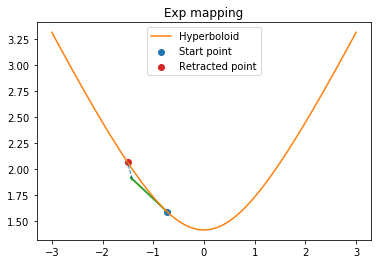

In [30]:
plt.plot(lins_x, linx_y, color="C1", label="Hyperboloid")
plt.scatter(x_start[0,1], x_start[0,0], color="C0", label="Start point")
plt.arrow(x_start[0,1], x_start[0,0], u_on_s[0,1], u_on_s[0,0], width=0.01, color="C2")

plt.scatter(pe[0,1], pe[0,0], color="C3", label="Retracted point")
plt.plot(np.concatenate((x_start[0,1]+ u_on_s[:,1], pe[:,1])), 
         np.concatenate((x_start[0,0]+ u_on_s[:,0], pe[:,0])), 
         color="C0", linestyle="--", linewidth=1)

plt.legend()
plt.title("Exp mapping")

# Uniform sampling

In [35]:
uniform_s = man.random_uniform((10,2))

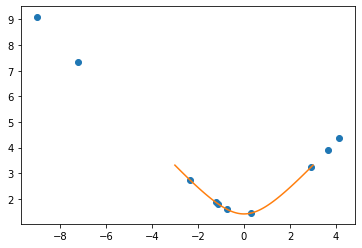

In [36]:
plt.plot(lins_x, linx_y, color="C1", label="Hyperboloid")
plt.scatter(uniform_s[:,1], uniform_s[:,0])

# Distance

In [37]:
k = 1
man_3d = Lorentz(k=k)

In [38]:
point = th.randn((1,3)) # sample points (~N(0,1))
point = man_3d.projx(point) # project onto the hyperboloid

sample_p = th.randn((50,3))*2 # bigger variance
sample_p = man_3d.projx(sample_p)

In [41]:
ps = th.randn((300,2))
ps = ps / ps.norm(dim=-1,keepdim=True) / 1.5
ps_h = math.poincare_to_lorentz(ps, k=th.Tensor([k]), eps=1e-8)

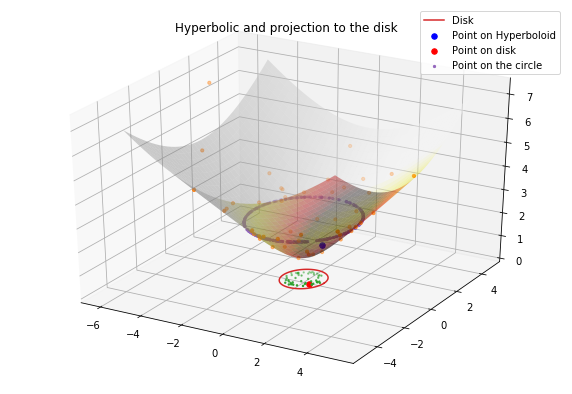

In [42]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np

lim_ = 5

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

x = np.arange(-lim_, lim_, 0.25)
y = np.arange(-lim_, lim_, 0.25)
x, y = np.meshgrid(x, y)
z = np.sqrt((x**2 + y**2) + k)

x_merge = np.concatenate((z.flatten()[None], y.flatten()[None], x.flatten()[None]), axis=0).T

xcolors = man_3d.dist(point, th.from_numpy(x_merge).to(th.float32)).view(*(x.shape)).T.numpy()
xcolors = np.log(xcolors)

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, alpha=0.4, facecolors=cm.hot(xcolors))
ax.scatter(point[:, 1], point[:, 2], point[:, 0], color="b", s=30, label="Point on Hyperboloid")

point_disk = math.lorentz_to_poincare(point, k=k)
sample_p_disk = math.lorentz_to_poincare(sample_p, k=k)

ax.scatter(point_disk[:,0], point_disk[:,1], 0., color="r", s=30, label="Point on disk")

# plot samples
ax.scatter(sample_p[:, 1], sample_p[:, 2], sample_p[:, 0], color="C1", s=10)
ax.scatter(sample_p_disk[:, 0], sample_p_disk[:, 1], 0, color="C2", s=2)


# plot circle
theta = np.linspace(0, 2*np.pi, 100)
r = np.sqrt(1.0)
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

ax.plot(x1, x2, 0., color="C3", label="Disk")

# plot circle samples
ax.scatter(ps_h[:, 1], ps_h[:, 2], ps_h[:, 0], color="C4", s=5, label="Point on the circle")

# TODO: add subplotting with poincare disk

ax.set_zlim(bottom=0)
plt.legend()
plt.title("Hyperbolic and projection to the disk")
plt.show()

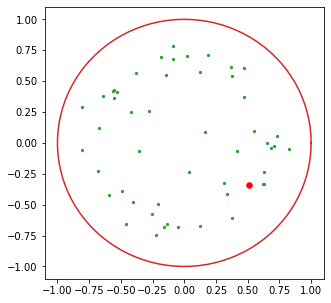

In [43]:
fig = plt.figure(figsize=(5,5))
plt.scatter(point_disk[:,0], point_disk[:,1], color="r", s=30, label="Point on disk")
plt.scatter(sample_p_disk[:, 0], sample_p_disk[:, 1], color="C2", s=5)
plt.plot(x1, x2, color="C3", label="Disk")